In [159]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
import simtk.unit as unit

# A Lennard-Jones Fluid

## The Lennard-Jones potential

The Lennard-Jones (LJ) potential between two particles is defined by the following equation, where $x$ is the distance between the particles, and $\sigma$ and $\epsilon$ are two parameters of the potential:
    
\begin{equation}
V(x) = 4 \epsilon \left[ \left( \frac{\sigma}{x} \right)^{12} - \left( \frac{\sigma}{x} \right)^6 \right]
\end{equation}

Lets see the shape of this function:

In [13]:
def LJ (x, sigma, epsilon):
    
    t = sigma/x
    t6 = t**6
    t12 = t6**2
    
    return 4.0*epsilon*(t12-t6)

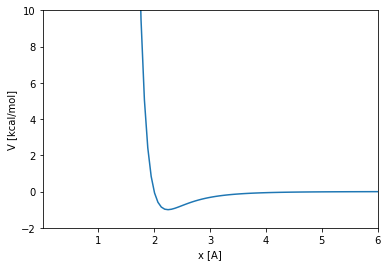

In [32]:
sigma = 2.0 * unit.angstrom
epsilon = 1.0 * unit.kilocalories_per_mole

xlim_figure = [0.01, 6.0]
ylim_figure = [-2.0, 10.0]

x = np.linspace(xlim_figure[0], xlim_figure[1], 100, True) * unit.angstrom
plt.plot(x, LJ(x, sigma, epsilon))
plt.xlim(xlim_figure)
plt.ylim(ylim_figure)
plt.xlabel('x [{}]'.format(x.unit.get_symbol()))
plt.ylabel('V [{}]'.format(epsilon.unit.get_symbol()))
plt.show()

The way the LJ potential is built, the $\sigma$ and $\epsilon$ parameters have a straightforward interpretation. The cut with $y=0$ is located in $x=\sigma$:

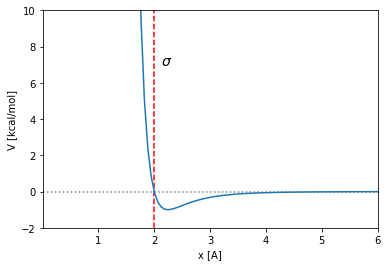

In [48]:
sigma = 2.0 * unit.angstrom
epsilon = 1.0 * unit.kilocalories_per_mole

xlim_figure = [0.01, 6.0]
ylim_figure = [-2.0, 10.0]

x = np.linspace(xlim_figure[0], xlim_figure[1], 100, True) * unit.angstrom
plt.plot(x, LJ(x, sigma, epsilon))
plt.hlines(0, xlim_figure[0], xlim_figure[1], linestyles='dotted', color='gray')
plt.vlines(sigma._value, ylim_figure[0], ylim_figure[1], linestyles='dashed', color='red')
plt.text(sigma._value+0.02*xlim_figure[1], 0.7*ylim_figure[1], '$\sigma$', fontsize=14)
plt.xlim(xlim_figure)
plt.ylim(ylim_figure)
plt.xlabel('x [{}]'.format(x.unit.get_symbol()))
plt.ylabel('V [{}]'.format(epsilon.unit.get_symbol()))
plt.show()

And $\epsilon$ is the depth of the minimum measured from $y=0$:

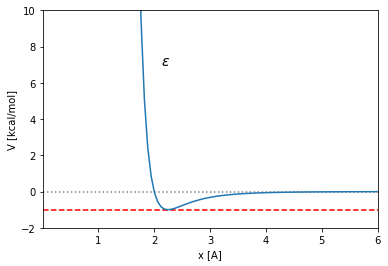

In [52]:
sigma = 2.0 * unit.angstrom
epsilon = 1.0 * unit.kilocalories_per_mole

xlim_figure = [0.01, 6.0]
ylim_figure = [-2.0, 10.0]

x = np.linspace(xlim_figure[0], xlim_figure[1], 100, True) * unit.angstrom
plt.plot(x, LJ(x, sigma, epsilon))
plt.hlines(0, xlim_figure[0], xlim_figure[1], linestyles='dotted', color='gray')
plt.hlines(-epsilon._value, xlim_figure[0], xlim_figure[1], linestyles='dashed', color='red')
plt.text(sigma._value+0.02*xlim_figure[1], 0.7*ylim_figure[1], '$\epsilon$', fontsize=14)
plt.xlim(xlim_figure)
plt.ylim(ylim_figure)
plt.xlabel('x [{}]'.format(x.unit.get_symbol()))
plt.ylabel('V [{}]'.format(epsilon.unit.get_symbol()))
plt.show()

Notice that the LJ potential has physical meaning when $\epsilon>0$ and $\sigma>0$ only. Actually, the potential vanishes whether $\epsilon=0$ or $\sigma=0$.

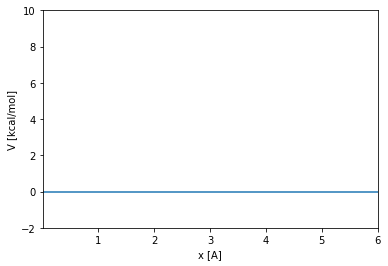

In [56]:
sigma = 0.0 * unit.angstrom
epsilon = 1.0 * unit.kilocalories_per_mole

xlim_figure = [0.01, 6.0]
ylim_figure = [-2.0, 10.0]

x = np.linspace(xlim_figure[0], xlim_figure[1], 100, True) * unit.angstrom
plt.plot(x, LJ(x, sigma, epsilon))
plt.xlim(xlim_figure)
plt.ylim(ylim_figure)
plt.xlabel('x [{}]'.format(x.unit.get_symbol()))
plt.ylabel('V [{}]'.format(epsilon.unit.get_symbol()))
plt.show()

### The Lennard Jones minimum and the size of the particles

The LJ potential has a single minimum located in $x_{min}$. Lets equal to $0$ the first derivative of the potential to find the value of $x_{min}$:

In [104]:
x, sigma, epsilon = sy.symbols('x sigma epsilon', real=True, positive=True)
V = 4.0*epsilon*((sigma/x)**12-(sigma/x)**6)
gradV = sy.diff(V,x)
roots=sy.solve(gradV, x)
x_min = roots[0]

In [107]:
x_min

1.12246204830937*sigma

The minimum is then located in:

\begin{equation}
x_{min} = 2^{1/6} \sigma
\end{equation}

where the potential takes the value:

\begin{equation}
V(x_{min}) = -\epsilon
\end{equation}

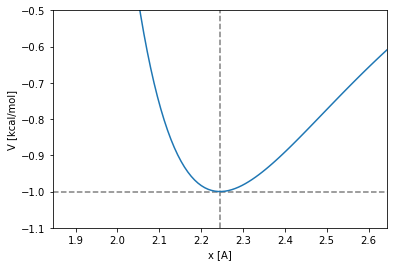

In [165]:
sigma = 2.0 * unit.angstrom
epsilon = 1.0 * unit.kilocalories_per_mole

x_min = 2**(1/6)*sigma
y_min = -epsilon

xlim_figure = [x_min._value-0.4, x_min._value+0.4]
ylim_figure = [y_min._value-0.1, y_min._value+0.5]

x = np.linspace(xlim_figure[0], xlim_figure[1], 100, True) * unit.angstroms
plt.plot(x, LJ(x, sigma, epsilon))
plt.hlines(y_min._value, xlim_figure[0], xlim_figure[1], linestyles='dashed', color='gray')
plt.vlines(x_min._value, ylim_figure[0], ylim_figure[1], linestyles='dashed', color='gray')
plt.xlim(xlim_figure)
plt.ylim(ylim_figure)
plt.xlabel('x [{}]'.format(x.unit.get_symbol()))
plt.ylabel('V [{}]'.format(epsilon.unit.get_symbol()))
plt.show()

This way two particles in the equilibrium position will be placed at a $2^{1/6} \sigma$ distance. The potential is thereby modeling two "soft spheres" atracting each other very lightly. Their radii, given that both particles are equal, are equal to $r$:

\begin{equation}
r = \frac{1}{2} x_{min} = 2^{-5/6} \sigma
\end{equation}

And we say these spheres are "soft" because their volume is not limited by a hard-wall potential, they can penetrate each other suffering a not infinite repulsive force.

### Time period of the small harmonic oscillations around the minimum

If we want to perform a molecular simulation of this two particles we should wonder how big the integrator timestep must be. To answer this question we can study the harmonic approximation around the minimum. Lets calculate the time period, $\tau$, of a small harmonic oscillation around the minimum:

In [117]:
x, sigma, epsilon = sy.symbols('x sigma epsilon', real=True, positive=True)
V = 4.0*epsilon*((sigma/x)**12-(sigma/x)**6)
gradV = sy.diff(V,x)
grad2V = sy.diff(V,x,x)

x_min = sy.solve(gradV,x)[0]
k_harm = grad2V.subs(x, x_min)

In [118]:
k_harm

57.1464378708551*epsilon/sigma**2

The harmonic constant of the second degree Taylor polynomial of the LJ potential at $x=x_{min}$ is then:

\begin{equation}
k_{harm} = 36·2^{2/3} \frac{\epsilon}{\sigma^2}
\end{equation}

The oscillation period of a particle with $m$ mass in an harmonic potential defined by $\frac{1}{2} k x²$ is:

\begin{equation}
\tau = 2 \pi \sqrt{ \frac{m}{k}}
\end{equation}

As such, the period of the small harmonic oscillations around the LJ minimum of particle with $m$ mass is:

\begin{equation}
\tau = 2 \pi \sqrt{ \frac{m}{k_{harm}}} = \frac{\pi}{3·2^{1/3}} \sqrt{\frac{m\sigma^2}{\epsilon}}
\end{equation}

With the mass and parameters taking values of amus, angstroms and kilocalories per mole, the time period is in the order of:

In [176]:
mass = 50.0 * unit.amu
sigma = 2.0 * unit.angstrom
epsilon = 1.0 * unit.kilocalories_per_mole

k = 36 * 2**(2/3) * epsilon/sigma**2

tau = 2*np.pi * np.sqrt(mass/k)

print(tau)

0.5746513694274475 ps


But, is this characteristic time a good threshold for a LJ potential? If the oscillations around the minimum are not small enough, the harmonic potential of the second degree term of the taylor expansion is easily overcome by the sharp left branch of the LJ potential:

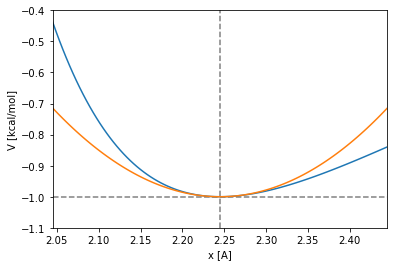

In [173]:
sigma = 2.0 * unit.angstrom
epsilon = 1.0 * unit.kilocalories_per_mole

k = 36 * 2**(2/3) * epsilon/sigma**2

x_min = 2**(1/6)*sigma
y_min = -epsilon

xlim_figure = [x_min._value-0.2, x_min._value+0.2]
ylim_figure = [y_min._value-0.1, y_min._value+0.6]

x = np.linspace(xlim_figure[0], xlim_figure[1], 100, True) * unit.angstroms
plt.plot(x, LJ(x, sigma, epsilon))
plt.plot(x, 0.5*k*(x-x_min)**2+y_min)
plt.hlines(y_min._value, xlim_figure[0], xlim_figure[1], linestyles='dashed', color='gray')
plt.vlines(x_min._value, ylim_figure[0], ylim_figure[1], linestyles='dashed', color='gray')
plt.xlim(xlim_figure)
plt.ylim(ylim_figure)
plt.xlabel('x [{}]'.format(x.unit.get_symbol()))
plt.ylabel('V [{}]'.format(epsilon.unit.get_symbol()))
plt.show()

Let's imagine the following situation. Let a particle be in the harmonic potential at temperature of 300K. Will the particle be more constrained in space than in the well of the LJ potential? Will the particle feel the harmonic potential softer or sharper than the LJ?
Or let's imagine this other situation. This time let a particle be oscillating in the harmonic potential with no friction and not thermal bath, but with a total energy equal to $\frac{1}{2}k_{B}T$ (with T being 300K). Will this former particle again feel the harmonic potential softer or sharper than the LJ?

Lets make some numbers to evaluate if the oscillation time period of the harmonic approximation will be a good time threshold for the integration timestep of a molecular dynamics.

An harmonic oscillation with the shape 

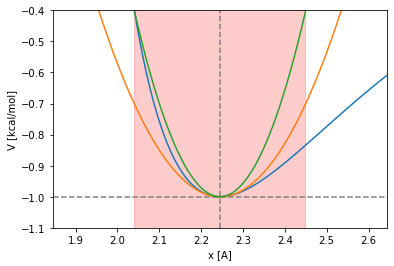

In [178]:
mass = 50.0 * unit.amu
sigma = 2.0 * unit.angstrom
epsilon = 1.0 * unit.kilocalories_per_mole
temperature = 300 * unit.kelvin
kB = unit.BOLTZMANN_CONSTANT_kB * unit.AVOGADRO_CONSTANT_NA

k = 36 * 2**(2/3) * epsilon/sigma**2
std = np.sqrt(kB*temperature/k)

x_min = 2**(1/6)*sigma
y_min = -epsilon

xlim_figure = [x_min._value-0.4, x_min._value+0.4]
ylim_figure = [y_min._value-0.1, y_min._value+0.6]

x = np.linspace(xlim_figure[0], xlim_figure[1], 100, True) * unit.angstroms
plt.plot(x, LJ(x, sigma, epsilon))
plt.plot(x, 0.5*k*(x-x_min)**2+y_min)
plt.plot(x, 0.5*2*k*(x-x_min)**2+y_min)
plt.hlines(y_min._value, xlim_figure[0], xlim_figure[1], linestyles='dashed', color='gray')
plt.vlines(x_min._value, ylim_figure[0], ylim_figure[1], linestyles='dashed', color='gray')
plt.axvspan(x_min._value - std._value, x_min._value + std._value, alpha=0.2, color='red')

plt.xlim(xlim_figure)
plt.ylim(ylim_figure)
plt.xlabel('x [{}]'.format(x.unit.get_symbol()))
plt.ylabel('V [{}]'.format(epsilon.unit.get_symbol()))
plt.show()

In [180]:
a=0.5*kB*temperature
a.in_units_of(unit.kilocalories_per_mole)

Quantity(value=0.2980809920370536, unit=kilocalorie/mole)